In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score,f1_score, roc_auc_score,roc_curve,classification_report
%matplotlib inline

In [42]:
heart_dis=pd.read_csv("data/heart-disease.csv")
heart_dis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
heart_dis.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [44]:
X=heart_dis.drop("target",axis=1)
y=heart_dis["target"]

In [45]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=2)

clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

#  Accuracy

In [46]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [47]:
print('Accuracy score of LogisticRegression Model', accuracy_score(y_test,y_pred1))
print('Accuracy score of DecisionTree Model', accuracy_score(y_test,y_pred2))

Accuracy score of LogisticRegression Model 0.9016393442622951
Accuracy score of DecisionTree Model 0.8360655737704918


# Confusion Matrix

In [62]:
conf_mat1 = confusion_matrix(y_test,y_pred1)
conf_mat2 = confusion_matrix(y_test,y_pred2)
conf_mat1 , conf_mat2

(array([[26,  6],
        [ 0, 29]], dtype=int64),
 array([[23,  9],
        [ 1, 28]], dtype=int64))

In [59]:
sns.set(font_scale=1.5)
def plot_con_mat(conf_mat):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,annot=True,cbar=False)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    bottom, top=ax.get_ylim()
    ax.set_ylim(bottom, top)

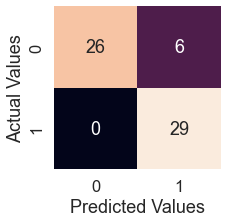

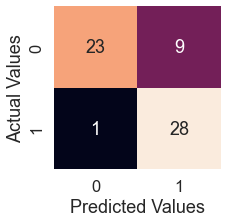

In [60]:
plot_con_mat(conf_mat1)
plot_con_mat(conf_mat2)

# Precision

In [52]:
print('Precision score of LogisticRegression Model', precision_score(y_test,y_pred1))
print('Precision score of DecisionTree Model', precision_score(y_test,y_pred2))

Precision score of LogisticRegression Model 0.8285714285714286
Precision score of DecisionTree Model 0.7567567567567568


# Recall

In [63]:
print('Recall score of LogisticRegression Model', recall_score(y_test,y_pred1))
print('Recall score of DecisionTree Model', recall_score(y_test,y_pred2))

Recall score of LogisticRegression Model 1.0
Recall score of DecisionTree Model 0.9655172413793104


# F1_score

In [64]:
print('F1 score of LogisticRegression Model', f1_score(y_test,y_pred1))
print('F1 score of DecisionTree Model', f1_score(y_test,y_pred2))

F1 score of LogisticRegression Model 0.90625
F1 score of DecisionTree Model 0.8484848484848485


# Roc_Auc_Score

In [71]:
y_prob1 = clf1.predict_proba(X_test)
y_prob2 = clf2.predict_proba(X_test)
y_pos_1 = y_prob1[:,1]
y_pos_2 = y_prob2[:,1]

In [73]:
print('ROC_AUC score of LogisticRegression Model', roc_auc_score(y_test,y_pos_1))
print('ROC_AUC score of DecisionTree Model', roc_auc_score(y_test,y_pos_2))

ROC_AUC score of LogisticRegression Model 0.9515086206896551
ROC_AUC score of DecisionTree Model 0.8421336206896552


# Roc_curve

In [74]:
fpr1, tpr1, thresholds1=roc_curve(y_test, y_pos_1)
fpr2, tpr2, thresholds2=roc_curve(y_test, y_pos_2)

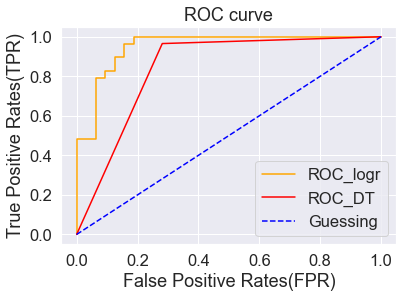

In [75]:
plt.plot(fpr1, tpr1, color="orange", label="ROC_logr")
plt.plot(fpr2, tpr2, color="red", label="ROC_DT")
plt.plot([0,1],[0,1],color="blue",linestyle="--",label="Guessing")
plt.xlabel("False Positive Rates(FPR)")
plt.ylabel("True Positive Rates(TPR)")
plt.title("ROC curve")
plt.legend()
plt.show()

# Classfication Report

In [77]:
print('--------------Classfication Report of LogisticRegression Model ---------------')
print(classification_report(y_test,y_pred1))
print('--------------Classfication Report of DecisionTree Model ---------------')
print(classification_report(y_test,y_pred2))

--------------Classfication Report of LogisticRegression Model ---------------
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.83      1.00      0.91        29

    accuracy                           0.90        61
   macro avg       0.91      0.91      0.90        61
weighted avg       0.92      0.90      0.90        61

--------------Classfication Report of DecisionTree Model ---------------
              precision    recall  f1-score   support

           0       0.96      0.72      0.82        32
           1       0.76      0.97      0.85        29

    accuracy                           0.84        61
   macro avg       0.86      0.84      0.83        61
weighted avg       0.86      0.84      0.83        61

